In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import cPickle
%matplotlib inline

In [23]:
df = pd.read_json('data/train_new.json')

In [8]:
df.columns

Index([u'acct_type', u'approx_payout_date', u'body_length', u'channels',
       u'country', u'currency', u'delivery_method', u'description',
       u'email_domain', u'event_created', u'event_end', u'event_published',
       u'event_start', u'fb_published', u'gts', u'has_analytics',
       u'has_header', u'has_logo', u'listed', u'name', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_desc',
       u'org_facebook', u'org_name', u'org_twitter', u'payee_name',
       u'payout_type', u'previous_payouts', u'sale_duration',
       u'sale_duration2', u'show_map', u'ticket_types', u'user_age',
       u'user_created', u'user_type', u'venue_address', u'venue_country',
       u'venue_latitude', u'venue_longitude', u'venue_name', u'venue_state'],
      dtype='object')

In [7]:
df.acct_type.unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [8]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [14]:
event_types = df
for elem in df[df['acct_type'] == 'fraudster_att'].description.values[:5]:
    bs = BeautifulSoup(elem, 'html.parser')
    print bs.text
    print '\n'*4

ATX Laugh Lounge at Amnesia's presents
 
Jimmy Roulette and friends
 
Doors open at 8 Showtime at 9
 







NOIREY ENTERTAINMENT - THE URBAN BOUTIQUE - LOFFREDO & ASSOCIATES PRESENTS
ALL WHITE  PARTY
FEATURING HOTTEST DJ'S 
DJ YUNG JAAHDJ JAMES REDI
 DJ'S SPINNING HIP HOP , SOCA, DANCEHALL, REGGAE, AFRICAN MUSIC
ENCOURAGED DRESS CODE: WHITE ATTIRE
MUSIC TILL 3AM WITH VALID WRISTBAND OBTAINED AT THE DOOR WITH YOUR TICKET.
 










It is finally here. This is like my graduation day that I never had after getting kicked out of UT. I would appreciate your attendance. More details will be given in this next week. But I wanted to give everyone advance notice. This will be a truly special event that will consist of the following LISTENING PARTY: 7:30pm-9:00pm--We will have sponsored food and drinks during this time--My EP will be played from start to finishEXIT BLACK BIRTHDAY CELEBRATION: 9:00pm-11:00pm featuring special guest opening acts and DJ BEST and others....ERIC WHITE LIVE PERFORM

In [15]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [19]:
df.groupby('category').mean()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
category,,,,,,,,,,,,,,,,,,,,,
fraudster,1.347687e+09,1508.886311,4.149265,0.073380,1.345333e+09,1.347255e+09,1.318542e+09,1.346777e+09,0.022428,1911.214362,...,1.035541,0.294023,14.125957,16.544470,0.756381,87.152359,1.337804e+09,1.619490,35.969856,-43.413620
locked,1.331776e+09,3776.629630,5.759259,0.259259,1.325978e+09,1.331344e+09,1.326109e+09,1.330600e+09,0.129630,1463.982407,...,4.259259,2.777778,51.796296,53.333333,0.888889,324.425926,1.297951e+09,2.425926,37.839521,-72.981219
premium,1.351390e+09,3813.358118,6.373717,0.478616,1.345955e+09,1.350958e+09,1.342921e+09,1.350680e+09,0.135699,2531.424853,...,8.600372,4.652680,50.395477,54.564293,0.850804,396.897842,1.311663e+09,2.821547,35.009662,-60.125079
spammer,1.349200e+09,5165.659243,6.657016,0.440980,1.344755e+09,1.348768e+09,1.342001e+09,1.348549e+09,0.211581,1553.537194,...,10.287305,5.240535,40.504464,43.768374,0.879733,591.445434,1.293654e+09,2.915367,38.118964,-74.383747
tos,1.353049e+09,5928.321429,6.119048,0.410714,1.349235e+09,1.352617e+09,1.349562e+09,1.352375e+09,0.101190,1625.689107,...,8.035714,6.422619,32.357143,36.136905,0.922619,349.422619,1.319054e+09,2.523810,37.844145,-61.613369


In [17]:
df['category'] = df.acct_type.apply(lambda x: x.split('_')[0])

[u'approx_payout_date', u'body_length', u'channels', u'delivery_method', u'event_created', u'event_end', u'event_published', u'event_start', u'fb_published', u'gts', u'has_analytics', u'has_header', u'has_logo', u'name_length', u'num_order', u'num_payouts', u'object_id', u'org_facebook', u'org_twitter', u'sale_duration', u'sale_duration2', u'show_map', u'user_age', u'user_created', u'user_type', u'venue_latitude', u'venue_longitude']


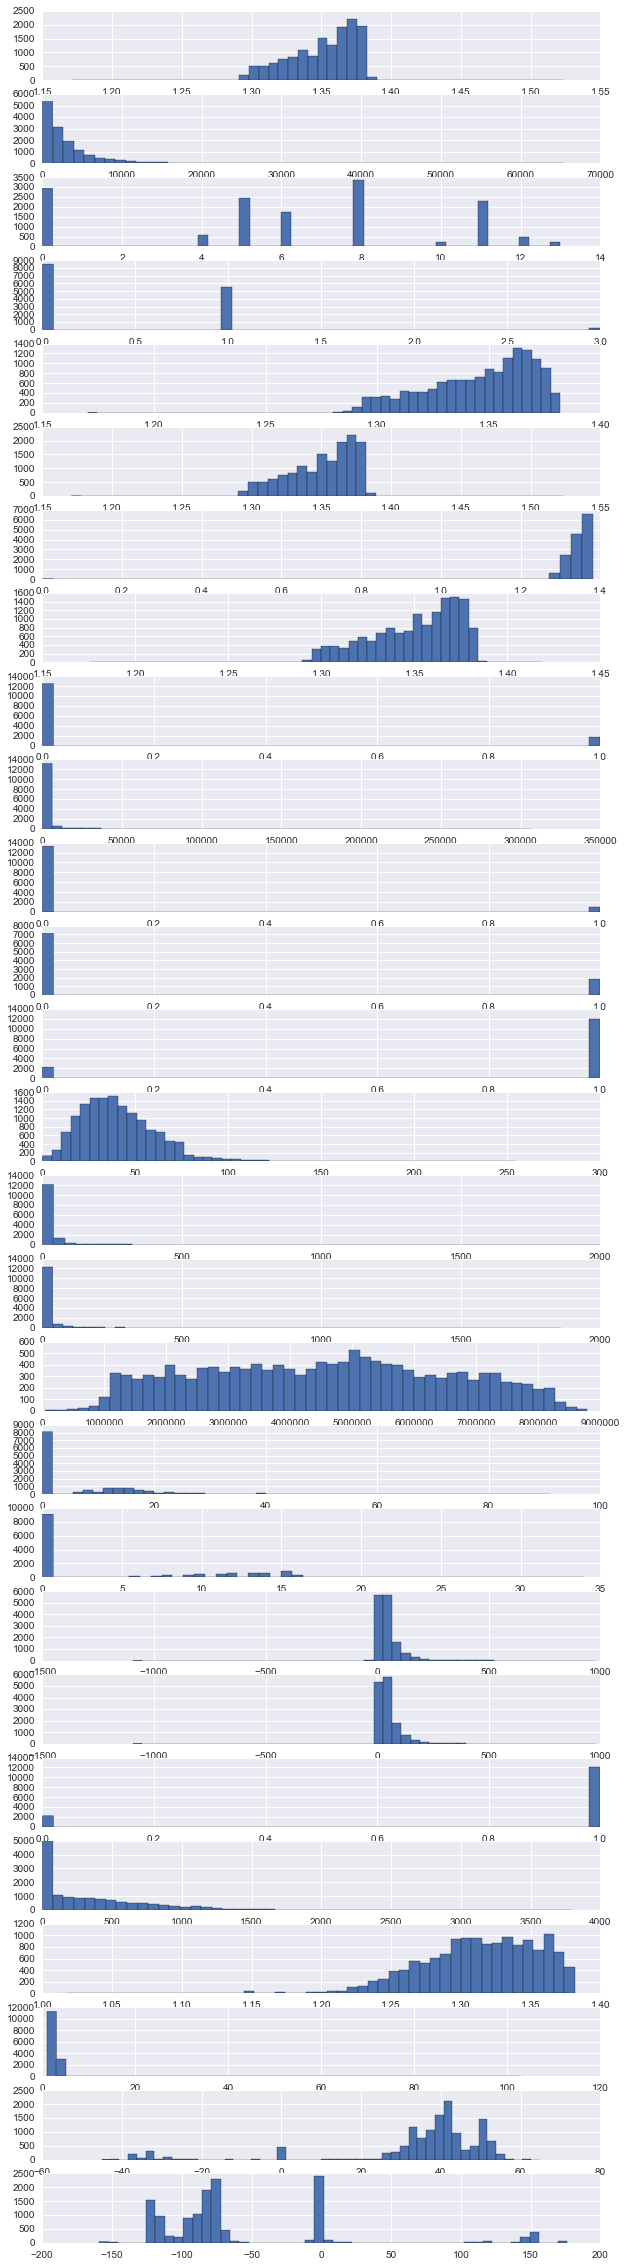

In [41]:
cols = [col for col in df.columns if df[col].dtype != 'object']
print cols
fig, axes = plt.subplots(len(cols), 1, figsize=(10, 40))
for col, ax in zip(cols, axes):
    df[col].hist(ax=ax, bins=50)
    ax.set_label(col)
    ax.legend()

In [35]:
df.acct_type.dtype == 'object'

True

In [10]:
df['acct_type'].unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [25]:
df['fraud_1'] = df['acct_type'].isin(['fraudster_event', 'fraudster', 'fraudster_att'])

AttributeError: max must be larger than min in range parameter.

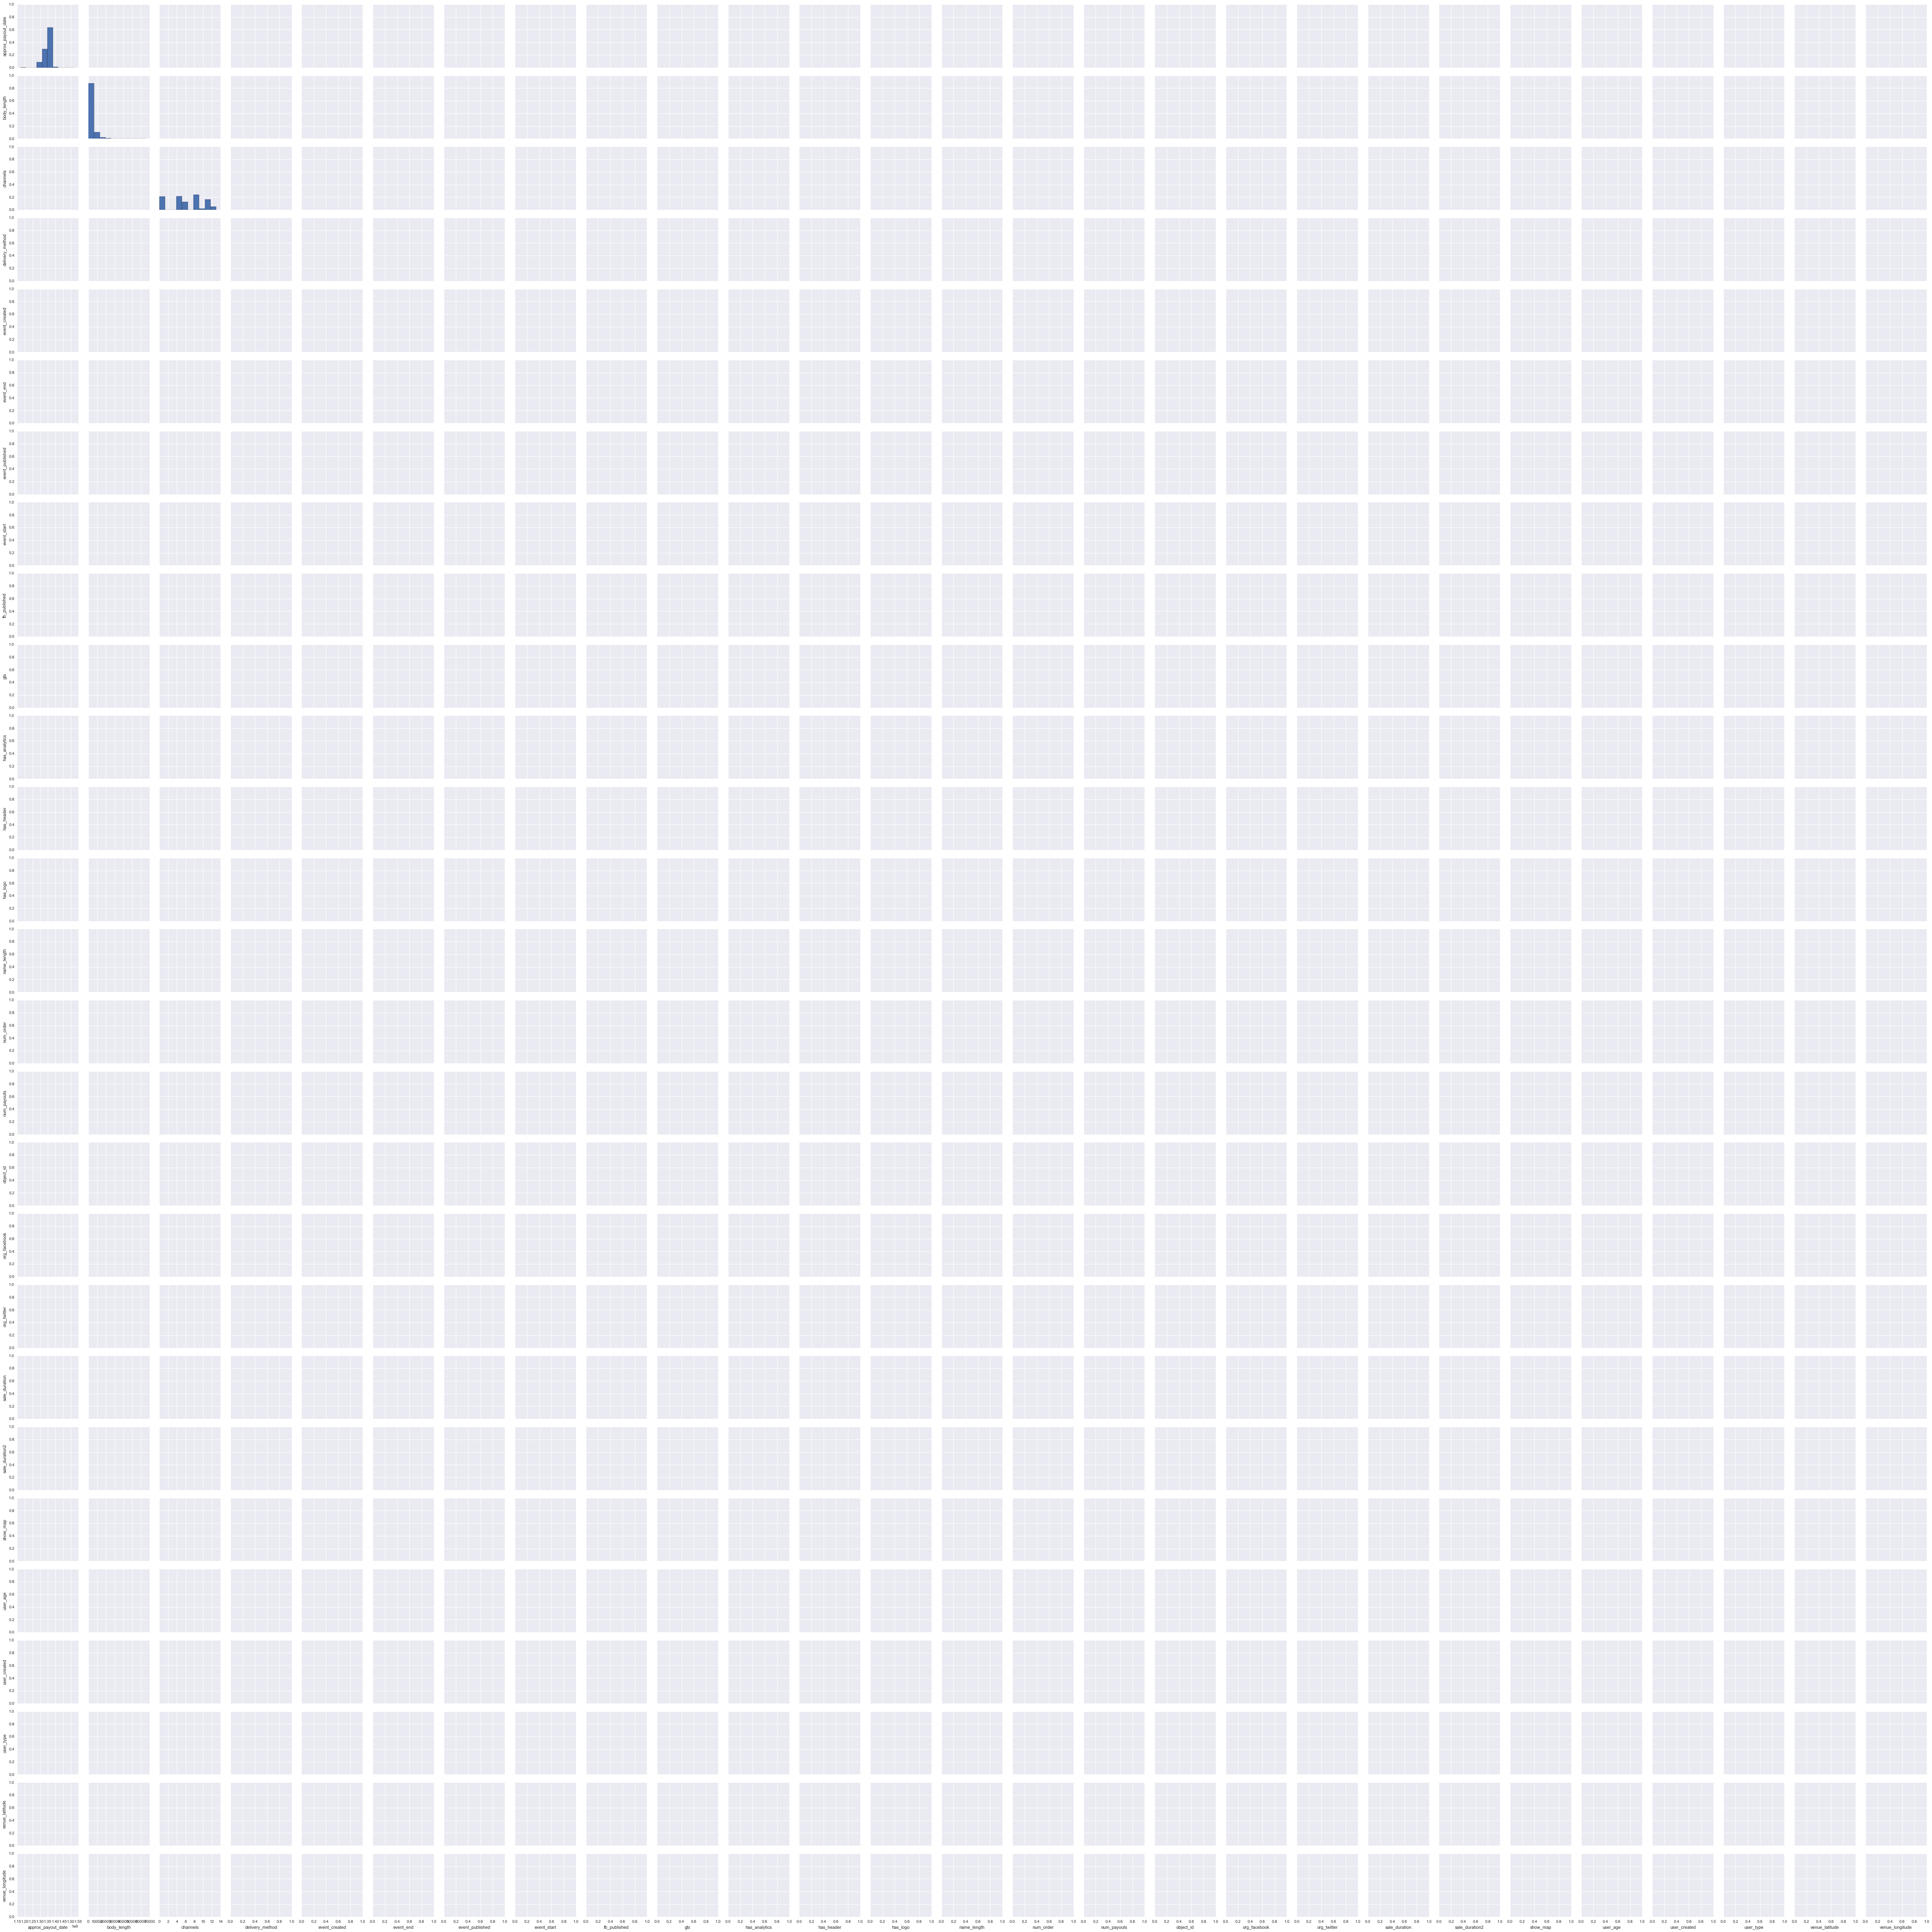

In [42]:
sns.pairplot(df)

In [26]:
X = df[['user_age', 'sale_duration2', 'body_length', 'channels', 'name_length']]
y = df['fraud_1']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

NameError: name 'y_true' is not defined

In [36]:
confusion_matrix(y_test, y_pred)

array([[3211,   50],
       [ 111,  213]])

In [39]:
line = ''
f = open('data/train_new.json')
line = f.readline()

In [49]:
df.head().to_json('test_file.json')

In [53]:
f = open('n_test_model')

In [59]:
cPickle.dump(rf, open('n_test_model', 'wb'))

In [62]:
test_event = df.head().to_json()

In [65]:
type(test_event)

str

In [66]:
import json